## CASE STUDY 1:  PREDICTING THE HOUSE PRICES

* importing turicreate

In [1]:
import turicreate as tc

# Load Some House sales Data

In [2]:
sales=tc.SFrame('data/home_data.sframe')
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650.0,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000.0,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000.0,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080.0,1.0,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930.0,1.0,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819.0,2.0,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711.0,1.0,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470.0,1.0,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560.0,2.0,0


In [3]:
sales.export_csv('predicting_house_price.csv')

# Exploring the data

In [4]:
tc.show(sales[1:5000]['sqft_living'],sales[1:5000]['price'])

Materializing X axis SArray

Materializing Y axis SArray

## create simple regression model of sqft_living to price



In [5]:
train_data,test_data=sales.random_split(.8,seed=0)

In [6]:
train_data

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650.0,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000.0,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000.0,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080.0,1.0,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930.0,1.0,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819.0,2.0,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711.0,1.0,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470.0,1.0,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560.0,2.0,0


## build the regression model

* we are using linear regression method which need train data, target (what we need to predict ) features 

In [7]:
sqft_model=tc.linear_regression.create(train_data,target='price',features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.007901     | 4353270.973335     | 2135453.701527       | 263777.227059                   | 246591.307466                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

## evaluate the simple model

In [8]:
print(test_data['price'].mean())

543054.0425632538


In [9]:
print(sqft_model.evaluate(test_data))

{'max_error': 4146489.676520486, 'rmse': 255182.93267485456}


* this shows it have very big error

## let's show what our prediction look like

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

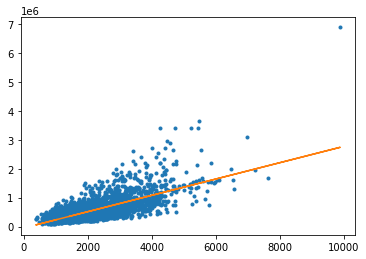

In [11]:
plt.plot(test_data['sqft_living'],test_data['price'],'.',test_data['sqft_living'],sqft_model.predict(test_data),'-')


* blue test data for houses yellow line pridicted house line

In [12]:
sqft_model.summary()

Class                          : LinearRegression

Schema
------
Number of coefficients         : 2
Number of examples             : 16514
Number of feature columns      : 1
Number of unpacked features    : 1

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 1.0113

Settings
--------
Residual sum of squares        : 1149018118950562.8
Training RMSE                  : 263777.2271

Highest Positive Coefficients
-----------------------------
sqft_living                    : 281.5827

Lowest Negative Coefficients
----------------------------
(intercept)                    : -46342.9055



# Explore other features in the data

In [13]:
my_fetures=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [14]:
sales[my_fetures].show()

Materializing SFrame

In [15]:
tc.visualization.box_plot(sales['zipcode'], sales['price'])

# Build a regression model with more features

In [16]:
my_features_model=tc.linear_regression.create(train_data,target='price',features=my_fetures)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.055531     | 4086284.926339     | 1148182.860952       | 190623.581079                   | 160647.903271                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [17]:
print(my_fetures)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


In [18]:
print(sqft_model.evaluate(test_data))
print(my_features_model.evaluate(test_data))

{'max_error': 4146489.676520486, 'rmse': 255182.93267485456}
{'max_error': 3151952.642009202, 'rmse': 180628.4362838759}


* u can see adding more features helped us to reduce the errors 

## Apply learned model to predict price of 3 houses

In [19]:
house1=sales[sales['id']=='5309101200']

In [20]:
house1

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000.0 |   4.0    |    2.25   |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    2400.0   |  5350.0  |  1.5   |     0      |  0   |     4     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1460.0   |     940.0     |  1929.0  |     0.0      |  98117  | 47.67632376 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.37010126 |     1250.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [21]:
%%html
<img src='house_images/house1.png'>

In [22]:
print(house1['price'])

[620000.0, ... ]


In [23]:
print(sqft_model.predict(house1))

[629455.6536389692]


* on an avg more feature will give accurate output

In [24]:
print(my_features_model.predict(house1))

[727457.6180649529]


* we can see that sometime for some house it may not be correct

## Prediction for second fancy house

In [25]:
house2=sales[sales['id']=='1925069082']
house2

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000.0 |   5.0    |    4.25   |
+------------+---------------------------+-----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    4640.0   | 22703.0  |  2.0   |     1      |  4   |     5     |  8.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   2860.0   |     1780.0    |  1952.0  |     0.0      |  98052  | 47.63925783 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.09722322 |     3140.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [26]:
%%html
<img src='house_images/house2.jpg'>

In [27]:
print(house2['price'])

[2200000.0, ... ]


In [28]:
print(sqft_model.predict(house2))

[1260200.9754604406]


In [29]:
print(my_features_model.predict(house2))

[1231717.3735376634]


## Last house,super house

In [30]:
bill_gates={'bedrooms':[8],
            'bathrooms':[25],
            'sqft_living':[50000],
            'sqft_lot':[225000],
            'floors':[4],
            'zipcode':['98039'],
            'condition':[10],
            'grade':[10],
            'waterfront':[10],
            'view':[4],
            'sqft_above':[37500],
            'yr_built':[1994],
            'yr_renovated':[2010],
            'lat':[47.627606],
            'long':[-122.242054],
            'sqft_living15':[5000],
            'sqftlot15':[40000]
            
            
    
}

In [31]:
%%html
<img src='house_images/bill_gates.png''>

In [32]:
print(sqft_model.predict(tc.SFrame(bill_gates)))

[14032793.742345236]


In [33]:
print(my_features_model.predict(tc.SFrame(bill_gates)))

[15069997.366190802]


In [34]:
my_features_model.save('predicting_house.model')


In [35]:
myhouse={'bedrooms':[25],
            'bathrooms':[10],
            'sqft_living':[1000],
            'sqft_lot':[1500],
            'floors':[10],
            'zipcode':['98039'],
            'condition':[10],
            'grade':[10],
            'waterfront':[1],
            'view':[0],
            'sqft_above':[37500],
            'yr_built':[1994],
            'yr_renovated':[2010],
            'lat':[47.627606],
            'long':[-122.242054],
            'sqft_living15':[5000],
            'sqftlot15':[40000]
            
            
    
}

In [36]:
print(sqft_model.predict(tc.SFrame(myhouse)))

[235239.8275005495]


In [37]:
print(my_features_model.predict(tc.SFrame(myhouse)))

[156012.28286881195]


In [38]:
sales.head()

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650.0,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000.0,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000.0,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080.0,1.0,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930.0,1.0,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819.0,2.0,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711.0,1.0,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470.0,1.0,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560.0,2.0,0


In [39]:
best_fetures=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode','waterfront','view','condition','grade']

In [40]:
sales[best_fetures].show()

Materializing SFrame

## Again building a model with some of best features

In [41]:
best_features_model=tc.linear_regression.create(train_data,target='price',features=best_fetures)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 10

Number of unpacked features : 10

Number of coefficients    : 79

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.018091     | 4412675.205399     | 1473586.607349       | 165584.294435                   | 162749.329760                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [42]:
print(best_fetures)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode', 'waterfront', 'view', 'condition', 'grade']


In [44]:
print(sqft_model.evaluate(test_data))
print(my_features_model.evaluate(test_data))
print(best_features_model.evaluate(test_data))

{'max_error': 4146489.676520486, 'rmse': 255182.93267485456}
{'max_error': 3151952.642009202, 'rmse': 180628.4362838759}
{'max_error': 3286485.364625452, 'rmse': 157868.54941530208}


## Applying best_feture model to predict previous house price

In [45]:
house1=sales[sales['id']=='5309101200']

In [46]:
house1

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000.0 |   4.0    |    2.25   |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    2400.0   |  5350.0  |  1.5   |     0      |  0   |     4     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1460.0   |     940.0     |  1929.0  |     0.0      |  98117  | 47.67632376 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.37010126 |     1250.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [47]:
%%html
<img src='house_images/house1.png''>

In [48]:
print(house1['price'])

[620000.0, ... ]


In [49]:
print(sqft_model.predict(house1))

[629455.6536389692]


In [51]:
print(my_features_model.predict(house1))

[727457.6180649529]


In [52]:
print(best_features_model.predict(house1))

[675341.7569886574]


## predicting house 2 price

In [54]:
%%html
<img src='house_images/house2.jpg'>

In [55]:
house2

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: 1

Data:
+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000.0 |   5.0    |    4.25   |
+------------+---------------------------+-----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    4640.0   | 22703.0  |  2.0   |     1      |  4   |     5     |  8.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   2860.0   |     1780.0    |  1952.0  |     0.0      |  98052  | 47.63925783 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.09722322 |     3140.0    | ... |
+---------------+---------------+-----+
[1 rows x 21 columns]

In [58]:
print(house2['price'])

[2200000.0]


In [57]:
print(sqft_model.predict(house2))

[1260200.9754604406]


In [59]:
print(my_features_model.predict(house2))

[1231717.3735376634]


In [60]:
print(best_features_model.predict(house2))

[1973028.7906332526]


## predicting bill gates house 

In [64]:
billgates=tc.SFrame(bill_gates)
billgates

Columns:
	bathrooms	int
	bedrooms	int
	condition	int
	floors	int
	grade	int
	lat	float
	long	float
	sqft_above	int
	sqft_living	int
	sqft_living15	int
	sqft_lot	int
	sqftlot15	int
	view	int
	waterfront	int
	yr_built	int
	yr_renovated	int
	zipcode	str

Rows: 1

Data:
+-----------+----------+-----------+--------+-------+-----------+-------------+
| bathrooms | bedrooms | condition | floors | grade |    lat    |     long    |
+-----------+----------+-----------+--------+-------+-----------+-------------+
|     25    |    8     |     10    |   4    |   10  | 47.627606 | -122.242054 |
+-----------+----------+-----------+--------+-------+-----------+-------------+
+------------+-------------+---------------+----------+-----------+------+------------+
| sqft_above | sqft_living | sqft_living15 | sqft_lot | sqftlot15 | view | waterfront |
+------------+-------------+---------------+----------+-----------+------+------------+
|   37500    |    50000    |      5000     |  225000  |   40000   |  4   |     10     |
+------------+-------------+---------------+----------+-----------+------+------------+
+----------+--------------+---------+
| yr_built | yr_renovated | zipcode |
+----------+--------------+---------+
|   1994   |     2010     |  98039  |
+----------+--------------+---------+
[1 rows x 17 columns]

In [69]:
print(sqft_model.predict(billgates))

[14032793.742345236]


In [70]:
print(my_features_model.predict(billgates))

[15069997.366190802]


In [72]:
print(best_features_model.predict(billgates))

[18373156.40999874]
